All marks in range(0, 9)

# Single datasets preprocessing

## Tg comedy dataset

Dataset built manually from telegram comedy channel. It contains setups and different punches from different autors.
Every punch has number of likes, which tell us about it quality.

In [3]:
import os
from glob import glob
import re
import pandas as pd

from tqdm import tqdm
tqdm.pandas()

### Create .txt files

### Convert .txt files to .tsv

In [32]:
df = pd.DataFrame()
pattern = r"(.+)\,\s\[.*\]\:\n(.+)"

for filepath in glob('data/comedy-news-tg-dataset/jokes*.txt'):
    
    if os.path.getsize(filepath) == 0:
        continue
        
    filenum = re.search('\d+', filepath)[0]
    print(filepath, end=', size: ')
    
    with open(filepath) as f:
        setup = f.readline().replace('\xa0', ' ').strip()[:-1]
        
        raw_jokes = f.read().replace('\xa0', ' ').strip()
        raw_jokes = re.sub(r'(Н|н)овость(\W|\n)*', '', raw_jokes)
        raw_jokes = re.sub(f'{setup}(\W|\n)*', '', raw_jokes)
        
    parsed = re.findall(pattern, raw_jokes)
    temp_df = pd.DataFrame(parsed, columns=['author', 'punch'])
    temp_df['setup'] = setup
    temp_df['mark'] = None
    
    temp_df = temp_df[['setup', 'author', 'punch', 'mark']]
    
    temp_df.to_csv(f'comedy-news-tg-dataset/tg_{filenum}.tsv', sep='\t', index=False)
    
    print(temp_df.shape[0])
    df = df.append(temp_df)

comedy-news-tg-dataset/jokes79.txt, size: 128
comedy-news-tg-dataset/jokes78.txt, size: 123
comedy-news-tg-dataset/jokes57.txt, size: 165
comedy-news-tg-dataset/jokes80.txt, size: 134
comedy-news-tg-dataset/jokes81.txt, size: 134
comedy-news-tg-dataset/jokes56.txt, size: 141
comedy-news-tg-dataset/jokes68.txt, size: 141
comedy-news-tg-dataset/jokes83.txt, size: 133
comedy-news-tg-dataset/jokes82.txt, size: 102
comedy-news-tg-dataset/jokes69.txt, size: 126
comedy-news-tg-dataset/jokes64.txt, size: 198
comedy-news-tg-dataset/jokes70.txt, size: 111
comedy-news-tg-dataset/jokes58.txt, size: 135
comedy-news-tg-dataset/jokes59.txt, size: 178
comedy-news-tg-dataset/jokes71.txt, size: 127
comedy-news-tg-dataset/jokes65.txt, size: 137
comedy-news-tg-dataset/jokes73.txt, size: 137
comedy-news-tg-dataset/jokes67.txt, size: 130
comedy-news-tg-dataset/jokes66.txt, size: 132
comedy-news-tg-dataset/jokes72.txt, size: 131
comedy-news-tg-dataset/jokes76.txt, size: 102
comedy-news-tg-dataset/jokes62.txt

### Join chunks to single dataset

In [4]:
# glob.glob('data/comedy-news-tg-dataset/*.tsv')
get_filenum = lambda t: int(re.search('\d+', t)[0])

In [7]:
df = pd.DataFrame()
for filepath in glob('data/comedy-news-tg-dataset/marked/tg_*.tsv'):
    temp_df = pd.read_csv(filepath, sep='\t')
    temp_df['setup_num'] = get_filenum(filepath)
    temp_df['punch_num'] = temp_df.index + 1
    print(temp_df.setup.values[0], len(temp_df))
    df = df.append(temp_df)
    
df['mark'] = df['mark'].fillna(0).astype(int)
print(df.shape)

Семилетняя россиянка Анастасия Радзинская вошла в десятку самых высокооплачиваемых блогеров в мире 179
YouTube откажется от производства оригинальных шоу и сериалов 109
В Испании молодежи помогут переехать от родителей 105
Хабиб Нурмагомедов создаст свою сеть ресторанов быстрого питания 185
Versace представил мешки для сбора собачьих фекалий за 20 тысяч рублей 137
В РПЦ составили молитву об одержимых компьютерной страстью 216
За год блогеры из TikTok заработали больше, чем главы Starbucks, McDonald’s 164
В Китае снимут ремейк фильма Холоп 111
Российский футболист рассказал об отказе Месси дать ему автограф 187
В Ростовской области в ЗАГСах запретили смеяться 157
Телефонные мошенники начали представляться сотрудниками «Госуслуг» и красть данные через QR-код 120
Половина россиян испытывают негатив, когда сидят в соцсетях. Треть из них считают себя зависимыми 119
Экономная женщина заставила семью использовать многоразовую туалетную бумагу 155
Ритуальная фирма в Омске предложила засыпать п

/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q

Опрос: россияне в среднем хотят зарабатывать 166 тыс. рублей в месяц. 224
Москва стала самым популярным городом для будущего переезда на пенсии 133
Apple добавила в новый iOS возможность разблокировать iPhone в маске 114
Мэр Красноярска своём Instagram объявил конкурс на лучшее название для уличного пылесоса 111
УЕФА подал в суд на пиццерию из-за пиццы «Лига шампиньонов» 88
Гвинет Пэлтроу выпустила новую ароматическую свечу Hands Off My Vagina 102
Из фильма «Дом Gucci» вырезали постельную сцену с Леди Гагой и Сальмой Хайек 106
На Netflix может появиться целая вселенная по «Игре в кальмара» 105
В приложении «Яндекс Go» появился индекс спроса, который объясняет, что влияет на цену поездки прямо сейчас 93
Марк Цукерберг выбыл из десятки богатейших людей мира 129
Россияне стали реже называть высокую зарплату главным критерием идеального работодателя 98
В Роттердаме частично разберут старинный мост, чтобы под ним смогла пройти новая яхта Джеффа Безоса 111
TikTok тестирует функцию платных по

/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q7zt59mjw37/T/ipykernel_11990/1601564059.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/var/folders/td/4g0swlbs5yg351q8l_8q

In [8]:
df.to_csv('data/comedy-news-tg-dataset/marked/complete_dataset.tsv', sep='\t', index=False)

In [9]:
df

,setup,author,punch,mark,setup_num,punch_num
0,Семилетняя россиянка Анастасия Радзинская вошл...,Александр Головко,Ее полное имя Анастасия 1Хbet Радзинская,13,22,1
1,Семилетняя россиянка Анастасия Радзинская вошл...,Хабиб,Лучший родительский стартап,1,22,2
2,Семилетняя россиянка Анастасия Радзинская вошл...,Ксения Журавлева,И получила по жопе,2,22,3
3,Семилетняя россиянка Анастасия Радзинская вошл...,Albert,В десятку за семилетку - такой программе даже ...,5,22,4
4,Семилетняя россиянка Анастасия Радзинская вошл...,Комар,Ее продюсеру за такое продвижение тоже светит ...,2,22,5
...,...,...,...,...,...,...
171,Balenciaga выпустил кроссовки на каблуках почт...,Никита Ватолин,"Фабрика ""Сударь"" в ответ традиционно ничего не...",1,13,172
172,Balenciaga выпустил кроссовки на каблуках почт...,Elizabeth 🦦,Миллениалы изобрели сапоги,0,13,173
173,Balenciaga выпустил кроссовки на каблуках почт...,Комар,За эти шпили у Лили будут шпилли-вилли,1,13,174
174,Balenciaga выпустил кроссовки на каблуках почт...,Aleksandr Scheglov,"Сразу видно, создатели Balenciaga досмотрели м...",0,13,175


## English datasets

Raw dataset with jokes on English language was found in internet, they are open-source.
We want to translate jokes on Russian with google translator.

In [123]:
import json
import pandas as pd
import re
from tqdm import tqdm
from tqdm.contrib.concurrent import process_map
tqdm.pandas()

from deep_translator import GoogleTranslator
from deep_translator.exceptions import NotValidPayload

In [114]:
translator = GoogleTranslator(source='en', target='ru')
def translate_eng2rus(text):
    translated = ''
    try:
        translated =  translator.translate(text)
    except NotValidPayload:
        print(f'Broken text: {text}')
    
    return translated

In [132]:
def remove_special_tokens(text):
    result = ''
    try:
        result = re.sub(r'\r|\n|\t', '', text)
    except:
        pass
    return result

### Reddit

In [105]:
with open('reddit_jokes.json') as f:
    reddit_dict = json.load(f)

In [ ]:
reddit_df = pd.DataFrame(reddit_dict) \
    .drop('id', axis=1) \
    .rename(columns={'body': 'punch', 
                     'title': 'setup', 
                     'score': 'mark'}) 

reddit_df.punch = reddit_df.punch.str.replace('\n', '').replace('\t', '')
reddit_df.setup = reddit_df.setup.str.replace('\n', '').replace('\t', '')

# Specify len < 500
reddit_df = reddit_df.loc[reddit_df.punch.apply(len) <= 500]
reddit_df = reddit_df.loc[reddit_df.punch.apply(len) > 5]

reddit_df['rus_punch'] = None
reddit_df['rus_setup'] = None

reddit_df = reddit_df.sort_values('mark', ascending=False) \
    .reset_index(drop=True)

In [111]:
reddit_df = pd.read_csv('data/eng-joke-dataset/reddit-dataset.tsv',
                        sep='\t')

/Users/naltukhov/Documents/programs/venv/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (1,2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [117]:
while True:
    need_translate_df = reddit_df.loc[reddit_df['rus_punch'].isna()]
    
    if len(need_translate_df) == 0:
        break
        
    print(len(need_translate_df))
    
    need_translate_index_sample = need_translate_df.iloc[0: min(1000, len(need_translate_df))].index
    
    reddit_df.loc[need_translate_index_sample, 'rus_punch'] = \
        reddit_df.loc[need_translate_index_sample, 'punch'].progress_apply(translate_eng2rus)
    
    reddit_df.loc[need_translate_index_sample, 'rus_setup'] = \
        reddit_df.loc[need_translate_index_sample, 'setup'].progress_apply(translate_eng2rus)

  0%|          | 0/1000 [00:00<?, ?it/s]

1185056


  0%|          | 0/1000 [00:00<?, ?it/s]

Broken text: nan
Broken text: nan
Broken text: nan
Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1184056


  0%|          | 0/1000 [00:00<?, ?it/s]

1183056


  2%|▏         | 17/1000 [00:11<07:03,  2.32it/s]

Broken text: nan


 86%|████████▌ | 858/1000 [11:59<02:04,  1.14it/s] 

Broken text: 69


  0%|          | 0/1000 [00:00<?, ?it/s]

1182056


  8%|▊         | 76/1000 [01:04<12:32,  1.23it/s]

Broken text: nan
Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1181056


  0%|          | 2/1000 [00:00<00:57, 17.33it/s]

1180056


  0%|          | 0/1000 [00:00<?, ?it/s]

1179056


  0%|          | 0/1000 [00:00<?, ?it/s]

1178056


  0%|          | 0/1000 [00:00<?, ?it/s]

1177056


  0%|          | 0/1000 [00:00<?, ?it/s]

1176056


  0%|          | 0/1000 [00:00<?, ?it/s]

1175056


 85%|████████▌ | 850/1000 [11:06<02:13,  1.13it/s]

Broken text: nan
Broken text: nan
Broken text: nan
Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1174056


  0%|          | 0/1000 [00:00<?, ?it/s]

1173056


  0%|          | 2/1000 [00:00<00:56, 17.55it/s]

1172056


  0%|          | 0/1000 [00:00<?, ?it/s]

1171056


 80%|████████  | 803/1000 [10:17<02:28,  1.33it/s]

Broken text: nan
Broken text: nan
Broken text: nan
Broken text: nan
Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1170056


  0%|          | 0/1000 [00:00<?, ?it/s]

1169056


 21%|██        | 206/1000 [02:52<09:20,  1.42it/s]

Broken text: nan
Broken text: nan
Broken text: nan


 38%|███▊      | 384/1000 [05:06<05:55,  1.73it/s]

Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1168056


 57%|█████▋    | 573/1000 [07:36<03:52,  1.84it/s]

Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1167056


  0%|          | 0/1000 [00:00<?, ?it/s]

1166056


  0%|          | 0/1000 [00:00<?, ?it/s]

1165056


 38%|███▊      | 376/1000 [05:20<08:45,  1.19it/s]  

Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1164056


 15%|█▌        | 150/1000 [01:58<10:42,  1.32it/s]

Broken text:               


  0%|          | 0/1000 [00:00<?, ?it/s]

1163056


 23%|██▎       | 227/1000 [03:07<06:52,  1.87it/s]

Broken text: ______________________


  0%|          | 0/1000 [00:00<?, ?it/s]

1162056


 27%|██▋       | 271/1000 [03:35<03:04,  3.95it/s]

Broken text: nan
Broken text: nan
Broken text: nan
Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1161056


 52%|█████▏    | 518/1000 [06:57<06:57,  1.15it/s]  

Broken text:              


  0%|          | 0/1000 [00:00<?, ?it/s]

1160056


  0%|          | 0/1000 [00:00<?, ?it/s]

1159056


  0%|          | 0/1000 [00:00<?, ?it/s]

1158056


 76%|███████▌  | 758/1000 [10:15<03:02,  1.32it/s]

Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1157056


 15%|█▌        | 153/1000 [02:04<09:18,  1.52it/s]

Broken text: nan


 82%|████████▏ | 817/1000 [11:17<02:03,  1.48it/s]

Broken text:              


 15%|█▌        | 152/1000 [02:10<12:59,  1.09it/s]

Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1156056


  0%|          | 2/1000 [00:00<00:51, 19.23it/s]

1155056


  7%|▋         | 69/1000 [00:57<15:20,  1.01it/s]

Broken text: nan


 91%|█████████ | 909/1000 [12:30<00:39,  2.32it/s]  

Broken text: 59


  0%|          | 0/1000 [00:00<?, ?it/s]

1154056


  0%|          | 0/1000 [00:00<?, ?it/s]

1153056


  0%|          | 0/1000 [00:00<?, ?it/s]

1152056


  0%|          | 0/1000 [00:00<?, ?it/s]

1151056


  0%|          | 0/1000 [00:00<?, ?it/s]

1150056


  0%|          | 2/1000 [00:00<00:51, 19.50it/s]

1149056


  0%|          | 0/1000 [00:00<?, ?it/s]

1148056


  7%|▋         | 70/1000 [00:55<11:06,  1.40it/s]

Broken text: nan


  0%|          | 0/1000 [00:00<?, ?it/s]

1147057


  0%|          | 2/1000 [00:00<00:56, 17.75it/s]

1146058


 61%|██████    | 609/1000 [08:37<05:00,  1.30it/s]

Broken text: __________________________________________


  0%|          | 2/1000 [00:00<00:59, 16.79it/s]

1145059


  0%|          | 2/1000 [00:00<00:56, 17.60it/s]

1144060


  0%|          | 0/1000 [00:00<?, ?it/s]

1143061


 28%|██▊       | 283/1000 [04:13<11:16,  1.06it/s]

Broken text: nan


  0%|          | 2/1000 [00:00<00:53, 18.54it/s]

1142062


 78%|███████▊  | 781/1000 [19:29:25<5:27:55, 89.84s/it]


KeyboardInterrupt: 

In [118]:
reddit_df.head()

,punch,mark,setup,rus_punch,rus_setup
0,On the condition he gets to install windows.,48526,Breaking News: Bill Gates has agreed to pay fo...,"При условии, что он установит окна.",Срочные новости: Билл Гейтс согласился заплати...
1,/r/Jokes,45500,I found a place where the recycling rate is 98%,/ г / Шутки,"Я нашел место, где уровень утилизации составля..."
2,"But its a silly comparison really, its like co...",39570,Steve jobs would have been a better president ...,"Но на самом деле это глупое сравнение, это как...","Стив Джобс был бы лучшим президентом, чем Дона..."
3,We went and had some drinks. Cool guy. Wants t...,36421,My girlfriend told me to take the spider out i...,Мы пошли и выпили. Клевый парень. Хочет быть в...,"Моя девушка посоветовала мне вытащить паука, а..."
4,Please don't upvote. Her strap-on is huge.,35772,"For every upvote this gets, my girlfriend and ...","Пожалуйста, не голосуйте. Ее страпон огромен.",На каждый положительный голос мы с моей девушк...


In [119]:
reddit_df.to_csv('data/eng-joke-dataset/reddit-dataset.tsv',
                 sep='\t', index=False)

In [135]:
rus_reddit_df = reddit_df.loc[~reddit_df.rus_punch.isna(), 
                              ['rus_punch', 'rus_setup', 'mark']]
rus_reddit_df.columns = ['punch', 'setup', 'mark']

rus_reddit_df.punch = rus_reddit_df.punch.apply(remove_special_tokens)
rus_reddit_df.setup = rus_reddit_df.setup.apply(remove_special_tokens)

In [137]:
rus_reddit_df

,punch,setup,mark
0,"При условии, что он установит окна.",Срочные новости: Билл Гейтс согласился заплати...,48526
1,/ г / Шутки,"Я нашел место, где уровень утилизации составля...",45500
2,"Но на самом деле это глупое сравнение, это как...","Стив Джобс был бы лучшим президентом, чем Дона...",39570
3,Мы пошли и выпили. Клевый парень. Хочет быть в...,"Моя девушка посоветовала мне вытащить паука, а...",36421
4,"Пожалуйста, не голосуйте. Ее страпон огромен.",На каждый положительный голос мы с моей девушк...,35772
...,...,...,...
44990,"Те, что писают в душе, и лжецы!",В жизни есть два типа людей,11
44991,"Это объясняет, что случилось с теми килограмма...","[Проблема решена] Говорят, когда вы бреете вол...",11
44992,Мокрый нос.,В чем разница между близоруким и дальнозорким ...,11
44993,Вытащил мидию!,Только что вернулся с дискотеки с морепродуктами.,11


In [138]:
rus_reddit_df.to_csv('data/eng-joke-dataset/reddit-rus-dataset.tsv',
                 sep='\t', index=False)

### Wocka

In [19]:
with open('wocka.json') as f:
    wocka_dict = json.load(f)

In [20]:
wocka_dict[2]

{'body': "What's black and white and red all over?\r\n\r\nA newspaper.",
 'category': 'Other / Misc',
 'id': 4,
 'title': 'Black, White and Red'}

In [25]:
wocka_df = pd.DataFrame(wocka_dict) \
    .drop(['id', 'title'], axis=1) \
    .rename(columns={'body': 'punch'}) 

wocka_df.punch = wocka_df.punch.str.replace('\n', '').replace('\t', '')

# Specify len < 500
wocka_df = wocka_df.loc[wocka_df.punch.apply(len) <= 500]
wocka_df = wocka_df.loc[wocka_df.punch.apply(len) > 5]

wocka_df['rus_punch'] = None

In [ ]:
wocka_df = pd.read_csv('data/eng-joke-dataset/wocka-dataset.tsv',
                        sep='\t')

In [ ]:
while True:
    need_translate_df = wocka_df.loc[wocka_df['rus_punch'].isna()]
    
    if len(need_translate_df) == 0:
        break
        
    print(len(need_translate_df))
    
    need_translate_index_sample = need_translate_df.iloc[0: min(1000, len(need_translate_df))].index
    
    wocka_df.loc[need_translate_index_sample, 'rus_punch'] = \
        wocka_df.loc[need_translate_index_sample, 'punch'].progress_apply(translate_eng2rus)

In [ ]:
wocka_df = wocka_df[['rus_punch', 'category']] \
    .rename(columns={'rus_punch': 'joke'})

remove_tokens = lambda text: re.sub(r'\r|\n|\t', '', text)

wocka_df.joke = wocka_df.joke.apply(remove_tokens)

In [ ]:
wocka_df.to_csv('data/eng-joke-dataset/wocka-dataset.tsv',
                 sep='\t', index=False)

In [28]:
wocka_df

,punch,category
0,What do you call a cow with no legs?\r\n\r\nGr...,Animal
1,What do you call a cow jumping over a barbed w...,Animal
2,What's black and white and red all over?\r\n\r...,Other / Misc
3,"So, this guy walks into a bar.\r\n\r\nAnd says...",Bar
4,"If the opposite of pro is con, isn't the oppos...",One Liners
...,...,...
10014,(A man comes to my register with a mint chocol...,Men / Women
10015,(I am shelving DVDs in a library when a man co...,Children
10016,"Me: ""That will be 17.50, please.""\r\n\r\nCusto...",Religious
10017,"Me: ""Sir, would you like to use any coupons to...",At Work


## Twitter dataset

Dataset collected in twitter (russian researches which already tried to solve this problem). On russian language. No marks.

In [58]:
import pandas as pd
import json

In [59]:
with open('data/tweets-dataset/train.json') as f:
    train_json = json.load(f)

In [22]:
with open('data/tweets-dataset/test.json') as f:
    test_json = json.load(f)

In [25]:
df = pd.concat([
    pd.DataFrame(train_json.items(), columns=['joke', 'is_joke']),
    pd.DataFrame(test_json.items(), columns=['joke', 'is_joke']),
], axis=0)
df = df.loc[df.is_joke == 1][['joke']]

In [26]:
df.to_csv('data/tweets-dataset/tweeter_jokes.tsv', sep='\t', index=False)

In [27]:
df.shape

(156605, 1)

In [28]:
df.sample()

,joke
68637,"- Скажите, Холмс, а почему в Сочи не приедет О..."


## Stat parsed dataset

Dataset parsed from stat site from different channels. With mark for each joke.

In [23]:
import os
from glob import glob
import re
import pandas as pd

from tqdm import tqdm
tqdm.pandas()

In [36]:
'|'.join(['@anekdot18', '@AnekdotiRu', 'Анекдоты🔞', '@anekdot_hot',
                  '@anekdotitg18', '@anekdoti69', 'Пошлые анекдоты🔞'])

'@anekdot18|@AnekdotiRu|Анекдоты🔞|@anekdot_hot|@anekdotitg18|@anekdoti69|Пошлые анекдоты🔞'

In [33]:
def remove_stopwords(sr_: pd.Series):
    sr = sr_.copy()
    stop_words = ['@anekdot18', '@AnekdotiRu', 'Анекдоты🔞', '@anekdot_hot',
                  '@anekdotitg18', '@anekdoti69', 'Пошлые анекдоты🔞']
    for stop_word in stop_words:
        sr = sr.str.replace(stop_word, '')
    return sr

In [ ]:
def remove_urls(sr_: pd.Series):
    sr = sr_.copy()

    re.sub(r'^https?:\/\/.*[\r\n]*', '', text



    return sr

In [46]:
df = pd.DataFrame()
for filepath in glob('data/parsed-stat-dataset/parsed_chunk_*.csv'):
    temp_df = pd.read_csv(filepath, sep=';', engine='python')

    # Remove stop words
    temp_df.joke_text = temp_df.joke_text.replace(r'@anekdot18|@AnekdotiRu|Анекдоты🔞|@anekdot_hot|@anekdotitg18|@anekdoti69|Пошлые анекдоты🔞', '', regex=True)
    # Remove urls
    temp_df.joke_text = temp_df.joke_text.replace(r'https?:\/\/.*[\r\n]*', '', regex=True)
    # Filter by len
    temp_df = temp_df.loc[temp_df.joke_text.str.len() > 10]

    # Mark binarization
    temp_df.joke_mark = pd.qcut(temp_df.joke_mark, 10, labels=False, duplicates='drop')

    # print(temp_df.joke_text.sample(3).values)

    df = pd.concat([df, temp_df], axis=0)
df.shape

(44996, 4)

In [47]:
df.head()

,id,joke_text,joke_date,joke_mark
0,4ef4738c-ce5d-4872-a2fc-56e0f35e0bd1,"Однажды учёные решили провести эксперимент, ка...",2022-08-17 23:59,1
1,9757f6f3-06e0-4cfc-861c-697439c7a31f,"Два мужика бухают. Закончилась водка, а денег ...",2022-08-17 23:01,0
2,1f4711db-f42d-4adb-96da-82d92b73908d,Выпивают три мужика.\nОдин говорит:\n— Если мы...,2022-08-17 20:07,2
3,efc65564-c5f0-4325-8d48-2ce0ff3e181f,Да ты че не знаешь? Петрович умер...\n- Да ты ...,2022-08-17 19:07,2
4,829ac993-0b70-472e-a76f-e8425b6b0285,"У моего парня небольшой, сантиметров 13 где-то...",2022-08-17 18:07,0


<AxesSubplot:>

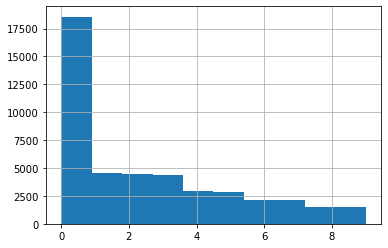

In [48]:
df.joke_mark.hist()

In [49]:
df.rename(columns={'joke_text': 'joke', 'joke_mark': 'mark'}) \
    [['joke', 'mark']] \
    .to_csv('data/parsed-stat-dataset/stat-dataset.csv', sep=';', index=False)

## Anecdote dataset

Anecdotes were parsed with selenium from site. With mark for each joke.

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('data/anecdote-dataset/anecdote_dataset.tsv', sep='\t')
# Mark binarization
df.likes = pd.qcut(df.likes, 10, labels=False, duplicates='drop')
df.shape

(82900, 2)

In [68]:
df.head()

,joke_text,likes
0,- Все проблемы в Думе решит Максим.\n- Это кто...,8
1,"Муж с женой в постели. Жена спит, мужу не спит...",7
2,Никогда не забывай свои корни! Постоянно закра...,7
3,"- Скажите, вы - натуральная блондинка?\n- Ммм....",5
4,Ходил с друзьями на курсы по избавлению от мат...,5


<AxesSubplot:>

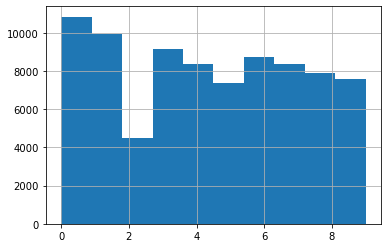

In [69]:
df.likes.hist()

In [70]:
df.rename(columns={'joke_text': 'joke', 'likes': 'mark'}) \
    [['joke', 'mark']] \
    .to_csv('data/anecdote-dataset/anecdote_dataset_bin.tsv', sep='\t', index=False)

# Join datasets

In [5]:
import pandas as pd
import numpy as np
import re
import plotly.express as px

In [6]:
anecdote_df = pd.read_csv('data/anecdote-dataset/anecdote_dataset_bin.tsv', sep='\t')[['joke']]
kvn_df = pd.read_csv('data/kvn-dataset/kvn_dataset.tsv', sep='\t') \
    .rename(columns={'joke_text': 'joke'})[['joke']]
wocka_df = pd.read_csv('data/eng-joke-dataset/wocka-dataset.tsv', sep='\t')[['joke']]
tweets_df = pd.read_csv('data/tweets-dataset/tweeter_jokes.tsv', sep='\t')[['joke']]
stat_df = pd.read_csv('data/parsed-stat-dataset/stat-dataset.csv', sep=';')[['joke']]

## Complete jokes dataset

Concatenation of different datasets into one dataset.
Trying to split jokes into setup-punch pairs. If split is impossible, then save complete joke.

In [50]:
complete_joke_df = pd.concat([stat_df, anecdote_df, kvn_df, wocka_df, tweets_df], axis=0) \
    .reset_index(drop=True)
complete_joke_df.shape

(294195, 1)

In [51]:
# Clean
def remove_special_tokens(text):
    result = ''
    try:
        result = re.sub(r'\r|\n|\t', '', text)
    except:
        pass
    return result

complete_joke_df.joke = complete_joke_df.joke.apply(remove_special_tokens)
complete_joke_df = complete_joke_df.drop_duplicates(subset=['joke'])
complete_joke_df.shape

(278181, 1)

In [52]:
complete_joke_df.sample(5)

,joke
95794,"- ""Кошачий корм стал на 20% вкуснее"". Как они ..."
225143,"Муж приходит вечером домой после работы, а его..."
282588,ОБЪЯВЛЕНИЕ Японский ресторан примет на работу ...
80725,В браке за примерное поведение не отпускают на...
195894,"- Здравствуйте, больной, как там наша нога? - ..."


px.histogram(complete_joke_df.joke.str.len())

### Try to find setup and punch in complete joke

In [53]:
def setup_punch_split(text):
    parts = re.split(r'\.{3}|\.|\?|\!|:', text)
    
    if (len(parts) > 3) or (len(parts) < 2):
        return None
    
    if (len(parts[-1]) == 0):
        parts = parts[:-1]
        
    if (len(parts) == 2) and (len(parts[0]) > 10) and (len(parts[1]) > 10):
        return (parts[0].strip(), parts[1].strip())

In [54]:
punch_setup_df = complete_joke_df.copy()
punch_setup_df['setup_punch'] = punch_setup_df.joke.apply(setup_punch_split)
punch_setup_df = punch_setup_df.loc[~punch_setup_df.setup_punch.isna()]
punch_setup_df.shape

(67772, 2)

In [55]:
punch_setup_df = pd.DataFrame(punch_setup_df.setup_punch.tolist(), columns=['setup', 'punch'])

In [56]:
# Remove setup-punch from complete dataset
complete_joke_df = complete_joke_df.loc[~complete_joke_df.index.isin(punch_setup_df.index)]
complete_joke_df.shape

(221115, 1)

In [57]:
# Save
punch_setup_df.to_csv('data/agg-setup-punch-dataset/setup-punch-from-complete-jokes.csv', index=False)
complete_joke_df.to_csv('data/agg-complete-text-dataset/agg-complete-text-dataset.csv', index=False)

## Setup-punch datasets

Concatenate setup-punch datasets together and clean text.

In [58]:
reddit_df = pd.read_csv('data/eng-joke-dataset/reddit-rus-dataset.tsv', sep='\t') \
    [['setup', 'punch']]
from_complete_df = pd.read_csv('data/agg-setup-punch-dataset/setup-punch-from-complete-jokes.csv', sep=',') \
    [['setup', 'punch']]

In [59]:
setup_punch_df = pd.concat([from_complete_df, reddit_df], axis=0)

In [81]:
# Clean
def remove_special_tokens(text):
    result = ''
    try:
        result = re.sub(r'\r|\n|\t', '', text)
    except:
        pass
    return result

setup_punch_df.setup = setup_punch_df.setup.apply(remove_special_tokens)
setup_punch_df.punch = setup_punch_df.punch.apply(remove_special_tokens)

setup_punch_df = setup_punch_df.drop_duplicates(subset=['setup']).dropna()

setup_punch_df = setup_punch_df.loc[setup_punch_df.setup.str.len() > 10]
setup_punch_df = setup_punch_df.loc[setup_punch_df.punch.str.len() > 0]

setup_punch_df.shape

(102987, 2)

In [82]:
setup_punch_df.sample(5)

,setup,punch
32986,"Чтобы никто не догадался, что Витя тупой, Витя...",Но он все равно тупой
20922,- А вы матом ругаетесь,"- Не только ругаюсь, но и похвалить могу"
25492,Финансовая компания,"проводим мониторинг, маркетинг, факторинг, фор..."
27021,Два еврея проходят мимо христианской церкви. . .,На двери висит табличка с надписью: «Примите х...
66528,Возвращаясь поздно со службы и видя недовольно...,К выносу мозга стоять смирно


px.histogram(setup_punch_df.setup.str.len())

px.histogram(setup_punch_df.punch.str.len())

In [83]:
setup_punch_df.to_csv('data/agg-setup-punch-dataset/agg-setup-punch-dataset.csv', index=False)
split = np.random.choice([0, 1, 2], p=[0.9, 0.08, 0.02], size=len(setup_punch_df))
setup_punch_df.iloc[split == 0].to_csv('data/agg-setup-punch-dataset/agg-setup-punch-dataset-train.csv', index=False)
setup_punch_df.iloc[split == 1].to_csv('data/agg-setup-punch-dataset/agg-setup-punch-dataset-valid.csv', index=False)
setup_punch_df.iloc[split == 2].to_csv('data/agg-setup-punch-dataset/agg-setup-punch-dataset-test.csv', index=False)

## Marked jokes dataset

Concatenation of datasets with joke and mark

In [18]:
import pandas as pd
import re

In [19]:
anecdote_df = pd.read_csv('data/anecdote-dataset/anecdote_dataset_bin.tsv', sep='\t')[['joke', 'mark']]
stat_df = pd.read_csv('data/parsed-stat-dataset/stat-dataset.csv', sep=';')[['joke', 'mark']]

In [20]:
marked_joke_df = pd.concat([stat_df, anecdote_df], axis=0) \
    .reset_index(drop=True)
marked_joke_df.shape

(130324, 2)

In [21]:
# Clean
def remove_special_tokens(text):
    result = ''
    try:
        result = re.sub(r'\r|\n|\t', '', text)
    except:
        pass
    return result

marked_joke_df.joke = marked_joke_df.joke.apply(remove_special_tokens)
marked_joke_df = marked_joke_df.drop_duplicates(subset=['joke']).dropna()
marked_joke_df.shape

(119559, 2)

In [22]:
marked_joke_df.sample(5)

,joke,mark
17290,Два обкуренных наркомана стоят на многоэтажке....,0
116055,Герасим сходил к логопеду. Теперь четче машет ...,8
13237,Мужик в публичный дом приходит и спрашивает:— ...,2
100098,"Многие мужья хотели бы, чтобы их жены были пох...",3
36687,"Что сказал муж Галины Ивановой,когда та стала ...",0


In [23]:
marked_joke_df.to_csv('data/agg-marked-joke-dataset/agg-marked-joke-dataset.csv', index=False)
split = np.random.choice([0, 1, 2], p=[0.9, 0.08, 0.02], size=len(marked_joke_df))
marked_joke_df.iloc[split == 0].to_csv('data/agg-marked-joke-dataset/agg-marked-joke-dataset-train.csv', index=False)
marked_joke_df.iloc[split == 1].to_csv('data/agg-marked-joke-dataset/agg-marked-joke-dataset-valid.csv', index=False)
marked_joke_df.iloc[split == 2].to_csv('data/agg-marked-joke-dataset/agg-marked-joke-dataset-test.csv', index=False)